In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2024-06-26 23:27:38.399803: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 23:27:38.535586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 23:27:38.535642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 23:27:38.554431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 23:27:38.595713: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Loading data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

False
False


In [4]:
#Studying the data
print("len of ytrain", len(y_train))
print("shape of ytrain:", y_train.shape)
print("shape of xtrain:", x_train.shape)

len of ytrain 60000
shape of ytrain: (60000,)
shape of xtrain: (60000, 28, 28)


In [5]:
mnist_d = list(zip(x_train, y_train))
mnist_df = pd.DataFrame(mnist_d, columns=["image", "label"])

mnist_test_d = list(zip(x_test, y_test))
mnist_test_df = pd.DataFrame(mnist_test_d, columns=["image", "label"])

Text(0.5, 1.0, '5')

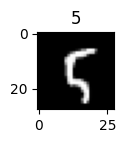

In [6]:
#plotting an image

image = x_train[100]
fig = plt.figure(figsize=(1, 1))
plt.imshow(image, cmap='grey')
plt.title(y_train[100])

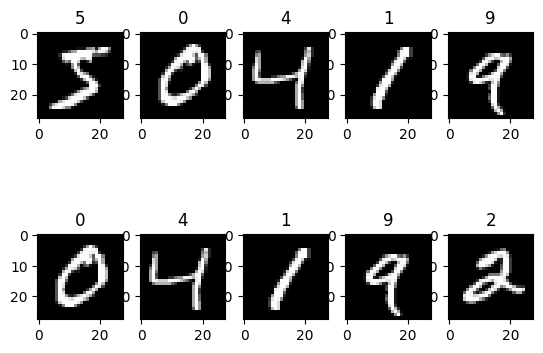

In [7]:
#plotting 5 images
fig, axes = plt.subplots(2, 5)
for row in range(2):
    for col in range(5):
        axes[row, col].imshow(x_train[row+col], cmap='grey')
        axes[row, col].set_title(str(y_train[row+col]))
plt.show()

<Axes: xlabel='label', ylabel='count'>

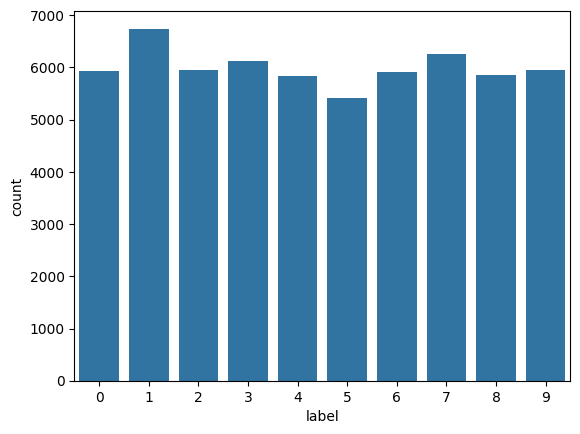

In [8]:
sns.countplot(data=mnist_df, x="label")

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#we need to input_shape (28, 28, 1) for out cnn model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train/255.0

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test = x_test/255.0

In [11]:
#creating one hot encoding for labels

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

2024-06-26 23:27:42.242344: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 23:27:42.335503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 23:27:42.335966: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [12]:
batch_size=64
num_classes=10
epochs=5

In [13]:
model_LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [14]:
model_LeNet.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [15]:
history = model_LeNet.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/5


2024-06-26 23:27:43.553397: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-26 23:27:43.678332: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-26 23:27:43.970537: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-26 23:27:44.034696: I external/local_xla/xla/service/service.cc:168] XLA service 0x7143231fb890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-26 23:27:44.034715: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-26 23:27:44.041831: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719424664.096068   24589 devic

844/844 [==============================] - 5s 3ms/step - loss: 0.2185 - acc: 0.9328 - val_loss: 0.0716 - val_acc: 0.9775
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0695 - acc: 0.9779 - val_loss: 0.0480 - val_acc: 0.9853
Epoch 3/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.0572 - val_acc: 0.9833
Epoch 4/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0382 - acc: 0.9875 - val_loss: 0.0423 - val_acc: 0.9892
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.0503 - val_acc: 0.9860


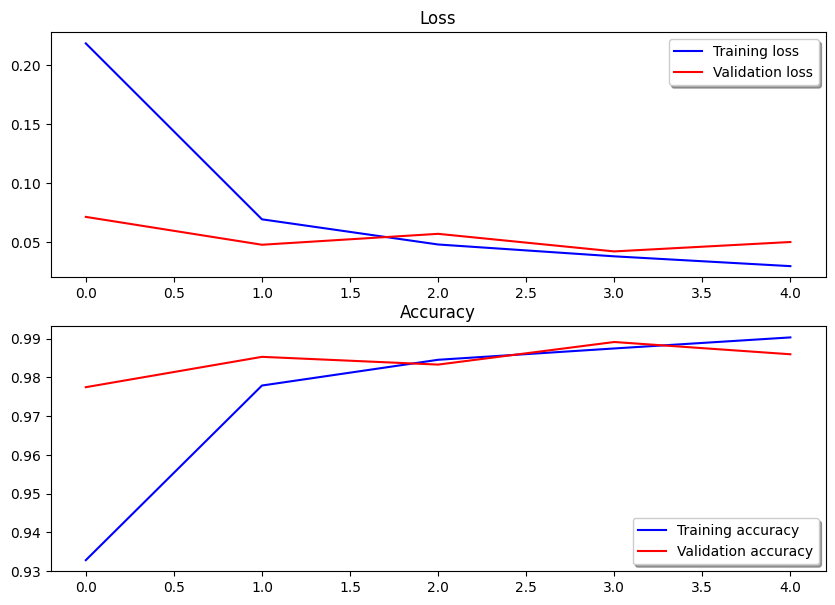

In [16]:
#plotting loss and accuracy curve for training and validation set

fig, axes = plt.subplots(2, 1, figsize=(10, 7))

axes[0].plot(history.history['loss'], color='b', label='Training loss')
axes[0].plot(history.history['val_loss'], color='r', label='Validation loss')
legend = axes[0].legend(loc='best', shadow=True)
axes[0].set_title("Loss")

axes[1].plot(history.history['acc'], color='b', label='Training accuracy')
axes[1].plot(history.history['val_acc'], color='r', label='Validation accuracy')
axes[1].set_title("Accuracy")
legend = axes[1].legend(loc='best', shadow=True)

In [17]:
print(history.history['val_loss'][-1])

0.05029744282364845


In [18]:
test_loss, test_acc = model_LeNet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0501 - acc: 0.9835


In [19]:
print(test_acc, test_loss)

0.9835000038146973 0.05010949820280075


In [20]:
y_pred = model_LeNet.predict(x_test)

313/313 [==============================] - 0s 852us/step


In [21]:
np.argmax(y_pred, axis=1)[1]

2

In [22]:
y_test[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [23]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [24]:
confusion_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

<Axes: >

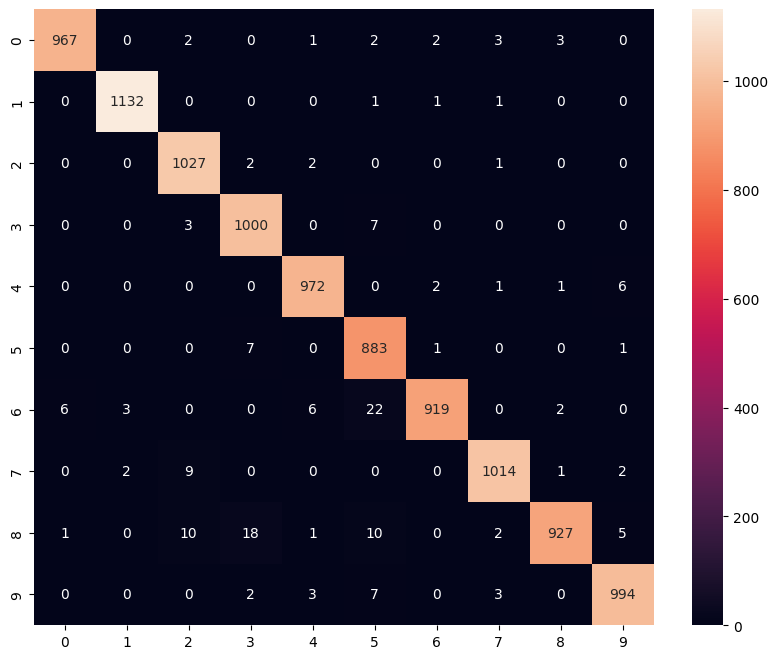

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [26]:
for i in range(500):
    if y_test_classes[i] != y_pred_classes[i]:
        print("image index::actual number::predicted number", i, y_test_classes[i], y_pred_classes[i])

image index::actual number::predicted number 184 8 3
image index::actual number::predicted number 217 6 5
image index::actual number::predicted number 247 4 6
image index::actual number::predicted number 259 6 0
image index::actual number::predicted number 326 2 4
image index::actual number::predicted number 339 6 5
image index::actual number::predicted number 340 5 3
image index::actual number::predicted number 381 3 2
image index::actual number::predicted number 445 6 5
image index::actual number::predicted number 449 3 5


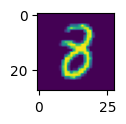

In [27]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[184])

In [28]:
def LeNet(input,
          input_shape,
          test,
          num_classes,
          batch_size,
          epochs,
          callbacks,
          activation_conv,
          conv_filter_size1,
          conv_filter_size2, 
          conv_first_layer_output_filter_maps,
          conv_second_layer_output_filter_maps,
          max_pool_filter_size1,
          max_pool_filter_size2,
          max_pool_filter_strides,
          dense_neuron_1,
          dense_neuron_2,
          activation_dense1,
          activation_dense2,
          activation_output,
          optimizer,
          loss,
          metric,
          val_split):
    
    #model architecture
    model_LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(conv_first_layer_output_filter_maps, (conv_filter_size1, conv_filter_size2), padding="same", activation=activation_conv, input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size=(max_pool_filter_size1, max_pool_filter_size2), strides=max_pool_filter_strides),
    tf.keras.layers.Conv2D(conv_second_layer_output_filter_maps, (conv_filter_size1, conv_filter_size2), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(max_pool_filter_size1, max_pool_filter_size2), strides=max_pool_filter_strides),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_neuron_1, activation=activation_dense1),
    tf.keras.layers.Dense(dense_neuron_2, activation=activation_dense2),
    tf.keras.layers.Dense(num_classes, activation=activation_output),
    ])
    #compiling model
    model_LeNet.compile(optimizer=optimizer, loss=loss, metrics=metric)
    history = model_LeNet.fit(input[0], input[1],
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_split=val_split)
    #predicting on test set
    test_loss, test_acc = model_LeNet.evaluate(test[0], test[1])
    #results
    print("Validation accuracy; ", history.history['val_acc'][-1], "Validation loss: ", history.history['val_loss'][-1])
    print("Test Accuracy: ", test_acc, "Test Loss: ", test_loss)
    


In [29]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc')>0.995):
            print("\n Accuracy reached 99.5, stopping training")
            self.model.stop_training=True

callbacks = myCallback()

In [30]:
import time

In [54]:

t0 = time.time()
LeNet(
    [x_train, y_train],
    (28, 28, 1),
    [x_test, y_test],
    10,
    64,
    5,
    callbacks,
    'elu',
    5,
    5,
    6,
    16,
    2,
    2,
    2,
    300,
    84,
    'relu',
    'relu',
    'softmax',
    tf.keras.optimizers.RMSprop(epsilon=1e-08),
    'categorical_crossentropy',
    'acc',
    0.8
)
print("time taken: ", time.time()-t0)

Epoch 1/5
188/188 [==============================] - 3s 13ms/step - loss: 0.4805 - acc: 0.8544 - val_loss: 0.1906 - val_acc: 0.9419
Epoch 2/5
188/188 [==============================] - 1s 8ms/step - loss: 0.1410 - acc: 0.9567 - val_loss: 0.1207 - val_acc: 0.9606
Epoch 3/5
188/188 [==============================] - 1s 8ms/step - loss: 0.0922 - acc: 0.9714 - val_loss: 0.1117 - val_acc: 0.9649
Epoch 4/5
188/188 [==============================] - 1s 8ms/step - loss: 0.0664 - acc: 0.9796 - val_loss: 0.0881 - val_acc: 0.9740
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0597 - acc: 0.9798
Validation accuracy;  0.9776462912559509 Validation loss:  0.07300733029842377
Test Accuracy:  0.9797999858856201 Test Loss:  0.059655070304870605
time taken:  9.595204591751099
